**Описание задания:**

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы:**

Преобразуйте данные:
проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
закодируйте категориальные переменные числовыми значениями по необходимости.

Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. 

Сравните, сделайте вывод.

Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

**Сформулируйте выводы по проделанной работе:**

как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
*может ли ROC-кривая проходить ниже диагонали?

**Результат:**

проведена оценка качества модели классификации;
реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

**Форма выполнения:**

ссылка на Jupyter Notebook, загруженный на GitHub;
ссылка на Google Colab;
файл с расширением .ipynb.
Инструменты:
Jupyter Notebook/Google Colab
GitHub
файл athletes.csv
Срок выполнения: дедлайн приема решений на проверку

**Рекомендации к выполнению:**

Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).
Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# Библиотеки

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

plt.rcParams["figure.figsize"] = (10,6)

# Load

In [324]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# EDA and FE

In [325]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


(None, (11538, 11))

Максимальное количество пропусков у признака weight. Посмотрим на признак в разрезе пола (пропусков не содержит) и восстановим пропущеные значения медианным значением для мужчин и женщин

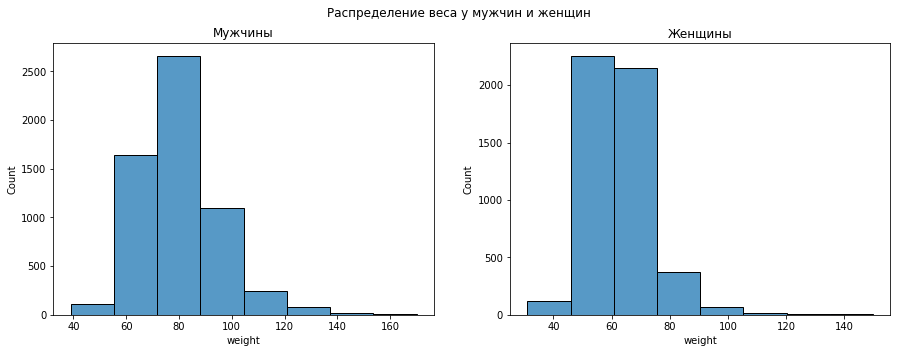

In [326]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Распределение веса у мужчин и женщин")
ax1.set_title("Мужчины")
sns.histplot(df.weight[df['sex']=='male'], ax=ax1,  bins=8)
ax2.set_title("Женщины")
sns.histplot(df.weight[df['sex']=='female'], ax=ax2,  bins=8)
plt.show()

In [327]:
df.weight[df['sex']=='male'].median(), df.weight[df['sex']=='female'].median(), 

(78.0, 61.0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


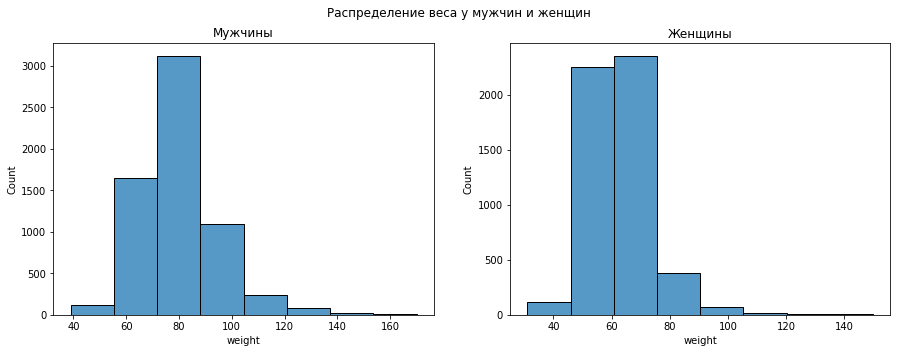

In [328]:
df.weight.loc[(pd.isnull(df.weight))&(df.sex=='male')] = df.weight[df['sex']=='male'].median()
df.weight.loc[(pd.isnull(df.weight))&(df.sex=='female')] = df.weight[df['sex']=='female'].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Распределение веса у мужчин и женщин")
ax1.set_title("Мужчины")
sns.histplot(df.weight[df['sex']=='male'], ax=ax1,  bins=8)
ax2.set_title("Женщины")
sns.histplot(df.weight[df['sex']=='female'], ax=ax2,  bins=8)
plt.show()

Далее восстановим пропуски в признаке height. Также посмотрим на признак в разрезе пола (пропусков не содержит) и восстановим пропущеные значения медианным значением для мужчин и женщин

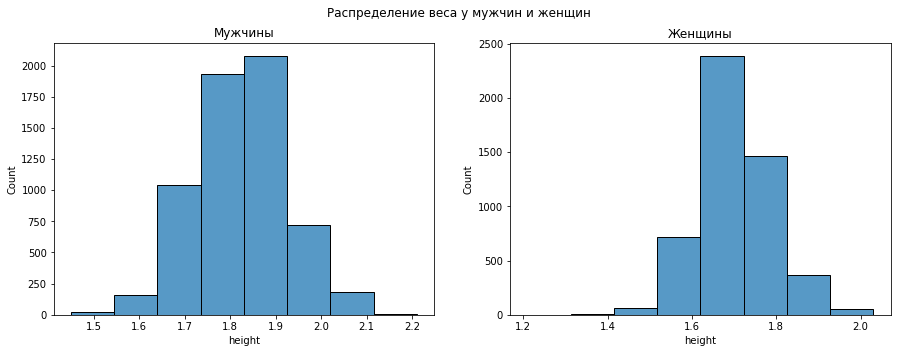

In [329]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Распределение веса у мужчин и женщин")
ax1.set_title("Мужчины")
sns.histplot(df.height[df['sex']=='male'], ax=ax1,  bins=8)
ax2.set_title("Женщины")
sns.histplot(df.height[df['sex']=='female'], ax=ax2,  bins=8)
plt.show()

In [330]:
df.height[df['sex']=='male'].median(), df.height[df['sex']=='female'].median(), 

(1.82, 1.7)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


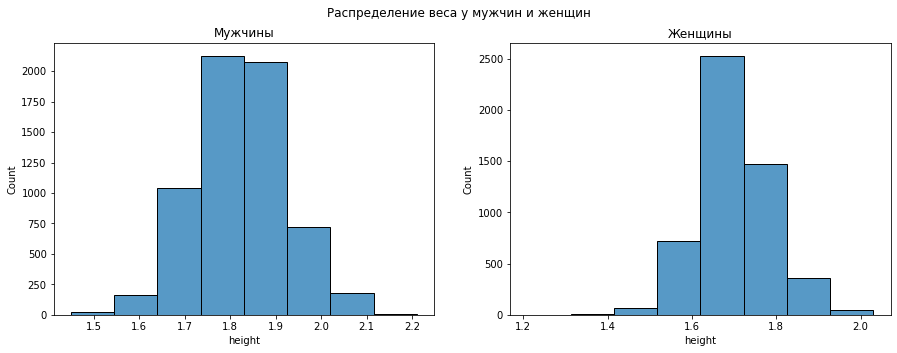

In [331]:
df.height.loc[(pd.isnull(df.height))&(df.sex=='male')] = df.height[df['sex']=='male'].median()
df.height.loc[(pd.isnull(df.height))&(df.sex=='female')] = df.height[df['sex']=='female'].median()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Распределение веса у мужчин и женщин")
ax1.set_title("Мужчины")
sns.histplot(df.height[df['sex']=='male'], ax=ax1,  bins=8)
ax2.set_title("Женщины")
sns.histplot(df.height[df['sex']=='female'], ax=ax2,  bins=8)
plt.show()

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Остался 1 пропуск в признаке dob. Посмотрим на объект

In [333]:
df[pd.isnull(df['dob'])]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,1.82,78.0,sailing,0,0,0


Удалим объект из набора данных

In [334]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11537 non-null  float64
 6   weight       11537 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


Закодируем национальность и вид спорта ohe

In [335]:
df = pd.get_dummies(df, columns=['nationality', 'sport'])
df.head(2)

,id,name,sex,dob,height,weight,gold,silver,bronze,nationality_AFG,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,736041664,A Jesus Garcia,male,10/17/69,1.72,64.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,532037425,A Lam Shin,female,9/23/86,1.68,56.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выделим год как признак.

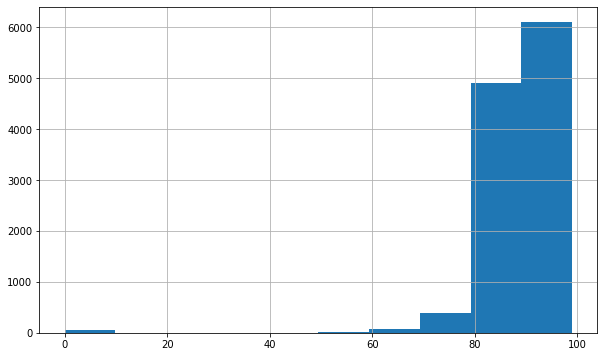

In [336]:
df.loc[:,'year'] = pd.to_numeric(df.dob.str[-2:])
df.year.hist()

Уберем разрыв между рожденными до и после 2000 года. За точку разрыва возьмем 1940 год.

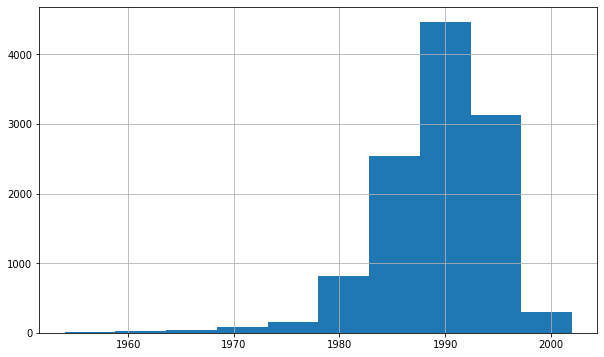

In [337]:
df.year = df.year.apply(lambda x: 2000+x if x<40 else 1900+x)
df.year.hist()

Закодируем пол

In [338]:
le = LabelEncoder()
df['sex_le'] = le.fit_transform(df.sex)

В качестве целевой переменной выберем получал медаль спортсмен или нет. Для этого подготовим значение целевой переменной и обучающий набор данных

In [339]:
df.loc[:, 'medals'] = df[['gold','silver','silver']].sum(axis=1)
df.loc[:, 'target'] = df.medals.apply(lambda x: 1 if x>0 else 0)

In [340]:
sum(df.target>0), sum(df.target==0)

(1215, 10322)

Наблюдается сильный дисбаланс классов

# Modeling

In [341]:
X = df.drop(labels=['id', 'name', 'dob', 'gold', 'silver', 'bronze', 'medals', 'sex', 'target'], axis=1)
y = df['target']

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [343]:
lr = LogisticRegression(random_state=42).fit(X_train, y_train)

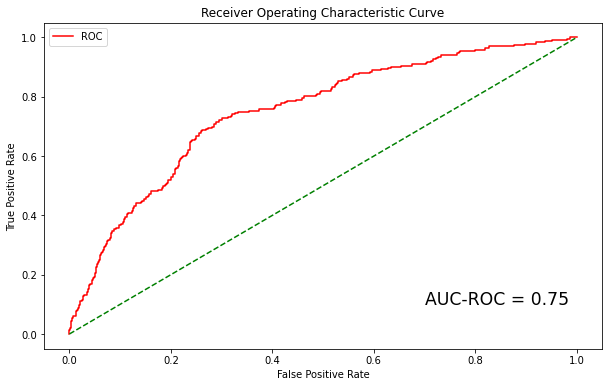

In [344]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.text(.7, .1, f'AUC-ROC = {round(roc_auc, 2)}', size='xx-large')
plt.show()

In [345]:
def get_roc(y_prob,y_true):
    """
    My analogue of roc_auc_score in sklearn
    """
    threshold = np.sort(y_prob)[::-1]
    y = y_true[y_prob.argsort()[::-1]]
    x_coord = [0]; y_coord = [0]
    x_count = 0; y_count = 0
    auc = 0
    for i in y:
        if i==1:
            y_count += 1/len_y
            x_coord.append(x_count)
            y_coord.append(y_count)      
        else:
            x_count += 1/len_x
            x_coord.append(x_count)
            y_coord.append(y_count)
            auc += (x_coord[-1]-x_coord[-2])*y_coord[-1]
    return x_coord, y_coord, auc

In [346]:
x_coord,y_coord,auc = get_roc(lr.predict_proba(X_test)[:, 1], np.array(y_test))

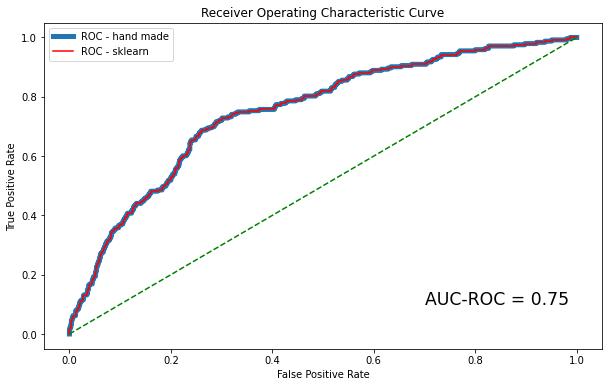

In [347]:
plt.plot(x_coord, y_coord, label='ROC - hand made', linewidth=5)
plt.plot(fpr, tpr, color='red', label='ROC - sklearn')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.text(.7, .1, f'AUC-ROC = {round(auc, 2)}', size='xx-large')
plt.show()

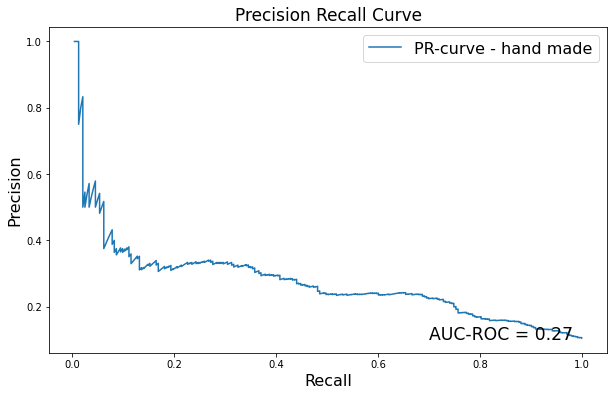

In [348]:
def get_pr(y_prob,y_true):
    """
    My analogue of precision_recall_curve in sklearn
    """
    pos = y_true[y_true==1]
    threshold = np.sort(y_prob)[::-1]
    y = y_true[y_prob.argsort()[::-1]]
    recall = [] ; precision = []
    tp = 0 ; fp = 0
    auc = 0
    for i in range(len(threshold)):
        if y[i] == 1:
            tp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
            auc += (recall[i]-recall[i-1])*precision[i]
        else:
            fp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
    return precision,recall,auc
 
precision_lr,recall_lr,auc_lr = get_pr(lr.predict_proba(X_test)[:, 1], np.array(y_test))

plt.plot(recall_lr, precision_lr, label='PR-curve - hand made')
plt.xlabel("Recall",fontsize=16)
plt.ylabel("Precision",fontsize=16)
plt.title("Precision Recall Curve",fontsize=17)
plt.legend(fontsize=16)
plt.text(.7, .1, f'AUC-ROC = {round(auc_lr, 2)}', size='xx-large')
plt.show()

# Выводы

Несмотря на то что модель показывает достаточно высокий показатель ROC-AUC = 0.75 считать результат хорошим нельзя. Об этом нам явно говорит низкий показатель PR-AUC = 0.27. Полагаю основной причиной такого результата служит сильная несбалансированность классов и недостаточность(отсутствие) значимых признаков по объектам.

Да, ROC кривая может проходить ниже диагональной линии. Это не значит, что модель работает плохо. Требуется инвертировать выходы модели и можно продолжать с ней работать.

# Литература
* https://russianblogs.com/article/43341087033/
* https://loginom.ru/blog/logistic-regression-roc-auc
* https://dyakonov.org/2017/07/28/
* https://ml-handbook.ru/chapters/model_evaluation/intro